<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Decision Tree   
<font color=black size=4>
    Hamidreza Yaghoubi 
    
<br><br>
<font size=4>
In this homework, we are going to implement the Classification Decision Tree. Keep in mind to complete all of the following questions and write your own codes in the TODO cells.

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 2: Classification Decision Tree (100 points)
We will implement a Classification Decision Tree from scratch in the following problem. Then we will use our model to predict malignant and benign breast cancer. For this purpose, we will use the breast_cancer.csv dataset which you can find more details about it <a href="https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset"><font face="Roboto">here</font></a>.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import log , log2
import random

<font face="Times New Roman" size=4><div dir=ltr>
## Classification Decision Tree Class (60 points)
In this section, you only need to fill TODO parts. You can find the logic and formula in both course slides and the web, but fill it out on your own. 

In [2]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        if self.value is not None:
            return True
        return False

In [3]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def is_splitting_finished(self, depth, num_class_labels, num_samples):
        return (depth == self.max_depth) or (num_samples <= self.min_samples_split) or (num_class_labels == 1)
        
        
    def split(self, X, y, feature, threshold):
        left_indexes = X[feature] <= threshold
        right_indexes = -left_indexes
        X_left = X[left_indexes]
        y_left = y[left_indexes]
        X_right = X[right_indexes]
        y_right = y[right_indexes]

        return X_left, X_right, y_left, y_right

    def entropy(self, y):

        #TODO

        p = len(y[y.diagnosis == 1]) / len(y)
        if p == 1 or p == 0:
            return 0
        ent = -((p * log2(p))+ ((1 - p) * log2(1 - p)))
        return ent
        

    def information_gain(self, X, y, feature, threshold):
        # TODO
        
        X_left, X_right, y_left, y_right = self.split(X, y, feature, threshold)
        H_y = self.entropy(y)
        p = len(X[X[feature] >= threshold]) / len(X)
        left_entropy = 0
        right_entropy = 0
        if len(y_left) != 0:
            # TODO
            left_entropy = (len(y_left)/len(y)) * self.entropy(y_left)
            pass
        else:
            # TODO
            return 0
    
        if len(y_right) != 0:
            # TODO
            right_entropy = (len(y_right)/len(y)) * self.entropy(y_right)
            pass
        else:
            # TODO
            return 0
                    
        # TODO
        H_y_given_x = left_entropy + right_entropy
        ig = H_y - H_y_given_x
        return ig

    def best_split(self, X, y):

        #TODO
        features = list(X.columns.values)
        random.shuffle(features)
        best_information_gain = 0
        best_feature = None
        best_threshold = None
        for feature in features:
            thresholds = list(set(list(X[feature])))
            for threshold in thresholds:
                info_gain = self.information_gain(X, y, feature, threshold)
                if info_gain >= best_information_gain:
                    best_information_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold
        
        
        
        
    def build_tree(self, X, y, depth=0):
        if self.is_splitting_finished(depth, len(X.columns), len(X)):
            return None

        best_feature, best_threshold = self.best_split(X, y)
        X_left, X_right, y_left, y_right = self.split(X, y, best_feature, best_threshold)

        left_node = self.build_tree(X_left, y_left, depth=depth + 1)
        right_node = self.build_tree(X_right, y_right, depth=depth + 1)

        value = None
        if left_node is None or right_node is None:
            true_value = len(y[y['diagnosis'] == 1])
            false_value = len(y[y['diagnosis'] == 0])
            if true_value >= false_value:
                value = 1
            else:
                value = 0

        return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node, value=value)

    def fit(self, X, y):
        self.root = self.build_tree(X, y)

    def predict(self, X):
        tree = self.root
        predicted_value = []
        for index in list(X.index):
            data = X.loc[index]
            current_tree = tree
            for depth in range(self.max_depth):
                if Node.is_leaf(current_tree):
                    predicted_value.append(current_tree.value)
                    break
                feature = current_tree.feature
                threshold = current_tree.threshold
                if data[feature] <= threshold:
                    current_tree = current_tree.left
                if data[feature] > threshold:
                    current_tree = current_tree.right

        return predicted_value

<font face="Times New Roman" size=4><div dir=ltr>
## Data Prepration (20 points)
In this section, you must perform a good EDA for data. Then split it into train and validation data. We will then use the validation data to find the best model hyperparameters.  

In [4]:

breast_cancer_pdf = pd.read_csv("breast_cancer.csv")
breast_cancer_pdf.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
# TODO
print(breast_cancer_pdf.info())
print('\n\n\n')
print('As you can see, Our dataset has 569 samples, None of Which has a null value.')
print('\n\n\n')
print("now let's count number of patients who have breast cancer:" )
print(breast_cancer_pdf["diagnosis"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None




As you can see, Our dataset has 569 samples, None of Which has a null value.




now let's count number of patients who have breast cancer:
1    357
0    212
Name: diagnosis, dtype: int64


In [6]:
breast_cancer_pdf.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


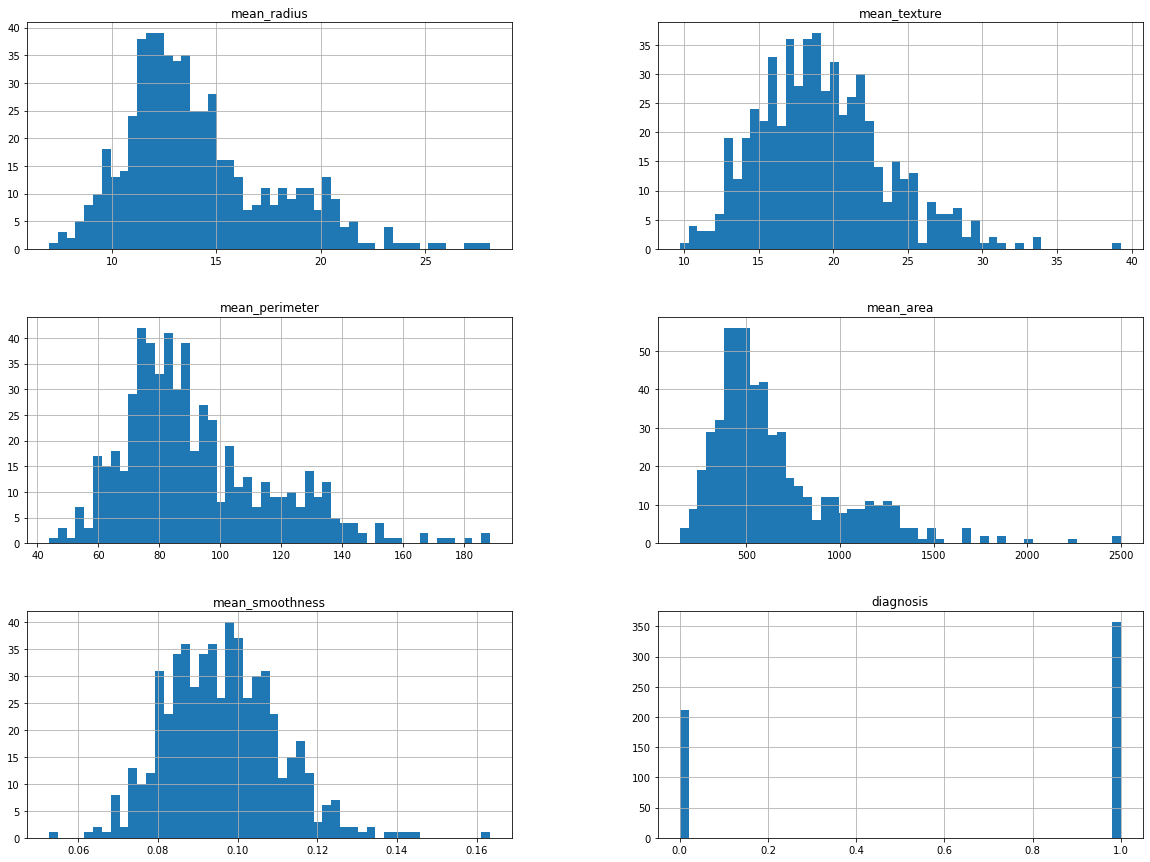

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
breast_cancer_pdf.hist(bins=50, figsize=(20,15))
plt.show()

Now let's plot some scatter to see the correlation between different attributes of dataset:


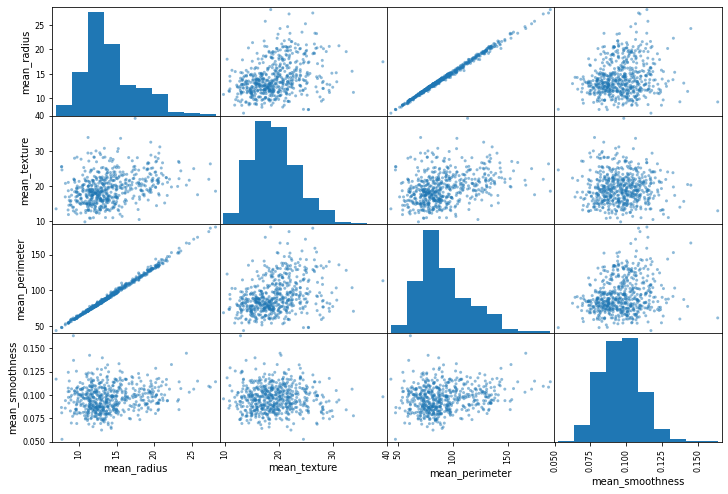

In [8]:
print("Now let's plot some scatter to see the correlation between different attributes of dataset:")

from pandas.plotting import scatter_matrix
attributes = ["mean_radius", "mean_texture", "mean_perimeter",
"mean_smoothness"]
axs = scatter_matrix(breast_cancer_pdf[attributes], figsize=(12, 8))
plt.show()

now we split the data into test and train datasets:

In [9]:

X = breast_cancer_pdf.iloc[: ,:5]
X

y = breast_cancer_pdf.iloc[:,5:]
y


x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.70, random_state=42)

<font face="Times New Roman" size=4><div dir=ltr>
## Training And Tuning Hyperparameters (20 points)
In this section, you only need to find the best hyperparameters for your model. You can test different values and permutations of hyperparameters by adding them to the lists below. Your model must have at least accuracy=0.85 on validation data.

In [10]:
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12]
min_samples_splits = [1,2,3,4,5,6,7,8,9,10]

In [11]:
best_max_depth = None
best_min_samples_split = None
best_accuracy = 0
best_model = None
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        clf = DecisionTree(max_depth, min_samples_split)
        clf.fit(x_train, y_train)
        y_val_pred = clf.predict(x_val)
        y_train_pred = clf.predict(x_train)
        accuracy = accuracy_score(y_val_pred, y_val)
        train_accuracy = accuracy_score(y_train_pred, y_train)
        print(f"accuracy of training set for [min_samples_splits={min_samples_split}-max_depths={max_depth}] ={train_accuracy}")
        print(f"accuracy of validation set for [min_samples_splits={min_samples_split}-max_depths={max_depth}] ={accuracy}")
        print("------------------------------------------------")
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split
            best_model = clf
            
print(best_accuracy)
print(best_max_depth)
print(best_min_samples_split)
print(best_model)

accuracy of training set for [min_samples_splits=1-max_depths=1] =0.5764705882352941
accuracy of validation set for [min_samples_splits=1-max_depths=1] =0.6491228070175439
------------------------------------------------
accuracy of training set for [min_samples_splits=2-max_depths=1] =0.5764705882352941
accuracy of validation set for [min_samples_splits=2-max_depths=1] =0.6491228070175439
------------------------------------------------
accuracy of training set for [min_samples_splits=3-max_depths=1] =0.5764705882352941
accuracy of validation set for [min_samples_splits=3-max_depths=1] =0.6491228070175439
------------------------------------------------
accuracy of training set for [min_samples_splits=4-max_depths=1] =0.5764705882352941
accuracy of validation set for [min_samples_splits=4-max_depths=1] =0.6491228070175439
------------------------------------------------
accuracy of training set for [min_samples_splits=5-max_depths=1] =0.5764705882352941
accuracy of validation set for 

accuracy of training set for [min_samples_splits=9-max_depths=4] =0.888235294117647
accuracy of validation set for [min_samples_splits=9-max_depths=4] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=10-max_depths=4] =0.888235294117647
accuracy of validation set for [min_samples_splits=10-max_depths=4] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=1-max_depths=5] =0.9294117647058824
accuracy of validation set for [min_samples_splits=1-max_depths=5] =0.9047619047619048
------------------------------------------------
accuracy of training set for [min_samples_splits=2-max_depths=5] =0.9294117647058824
accuracy of validation set for [min_samples_splits=2-max_depths=5] =0.9047619047619048
------------------------------------------------
accuracy of training set for [min_samples_splits=3-max_depths=5] =0.9294117647058824
accuracy of validation set for 

accuracy of training set for [min_samples_splits=7-max_depths=8] =0.888235294117647
accuracy of validation set for [min_samples_splits=7-max_depths=8] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=8-max_depths=8] =0.888235294117647
accuracy of validation set for [min_samples_splits=8-max_depths=8] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=9-max_depths=8] =0.888235294117647
accuracy of validation set for [min_samples_splits=9-max_depths=8] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=10-max_depths=8] =0.888235294117647
accuracy of validation set for [min_samples_splits=10-max_depths=8] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=1-max_depths=9] =0.9764705882352941
accuracy of validation set for [m

accuracy of training set for [min_samples_splits=4-max_depths=12] =0.9294117647058824
accuracy of validation set for [min_samples_splits=4-max_depths=12] =0.9047619047619048
------------------------------------------------
accuracy of training set for [min_samples_splits=5-max_depths=12] =0.888235294117647
accuracy of validation set for [min_samples_splits=5-max_depths=12] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=6-max_depths=12] =0.888235294117647
accuracy of validation set for [min_samples_splits=6-max_depths=12] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=7-max_depths=12] =0.888235294117647
accuracy of validation set for [min_samples_splits=7-max_depths=12] =0.8421052631578947
------------------------------------------------
accuracy of training set for [min_samples_splits=8-max_depths=12] =0.888235294117647
accuracy of validation set